In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
prop_16 = pd.read_csv('properties_2016.csv')
train_16 = pd.read_csv('train_2016_v2.csv',parse_dates=['transactiondate'])

/home/hskimim/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
train_16.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [6]:
prop_16.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


# Train data 파헤치기!!

### About LogError

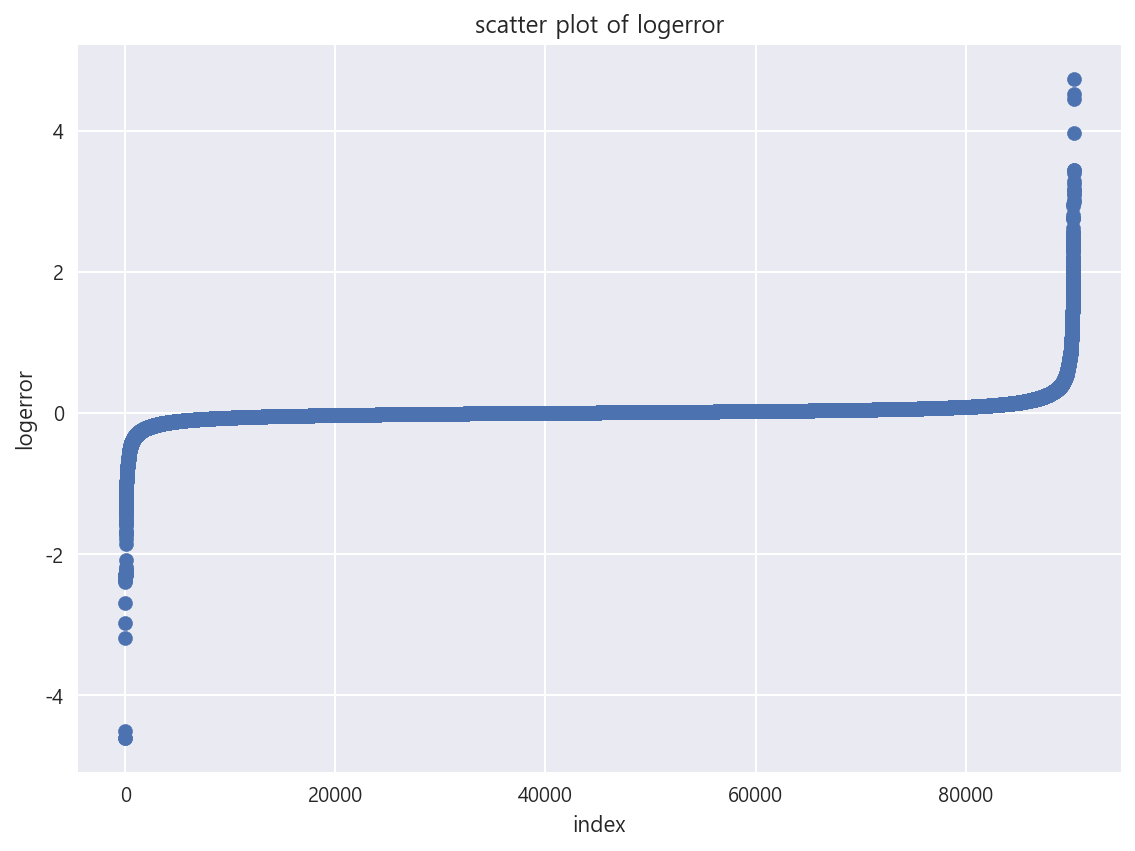

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(range(len(train_16.logerror)),np.sort(train_16.logerror))
plt.title('scatter plot of logerror')
plt.xlabel('index')
plt.ylabel('logerror')
plt.tight_layout()
plt.show()

logerror의 scatter plot을 그려보니, two-sided tail에 outlier가 있는 것으로 보인다.

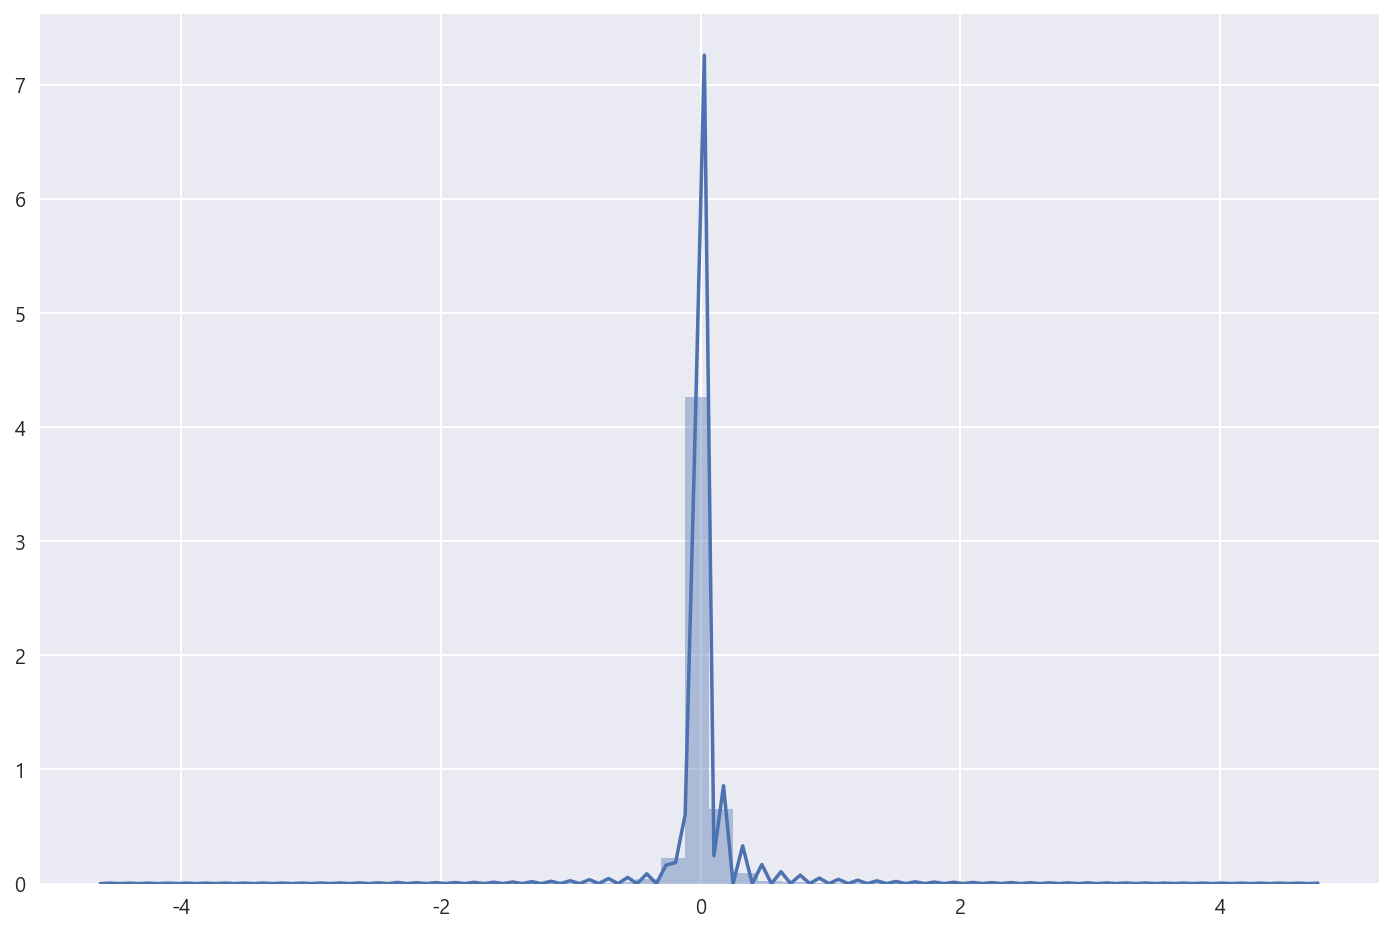

In [14]:
plt.figure(figsize=(12,8))
sns.distplot(train_16.logerror.values)
plt.show()

outlier로 인해서 logerror에 대한 dist가 양측이 매우 크게 형성된다. outlier를 제거해보자

In [5]:
upextreme = np.percentile(train_16.logerror.values,99)
downextreme = np.percentile(train_16.logerror.values,1)
# outlier를 제거하기 위해 percentile로 1<logerror<99 에 있게하여야 합니다.
upextreme

0.4638819999999963

In [6]:
train_16['logerror'].loc[train_16.logerror > upextreme] = upextreme
train_16['logerror'].loc[train_16.logerror < downextreme] = downextreme
# 위 두개의 식은 percentile 99 위, 1 아래에 있는 숫자를 해당 percentile 99,1에 해당하는 숫자로 전부 
# 바꿔서 outlier를 없애는 방식입니다.

/home/hskimim/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


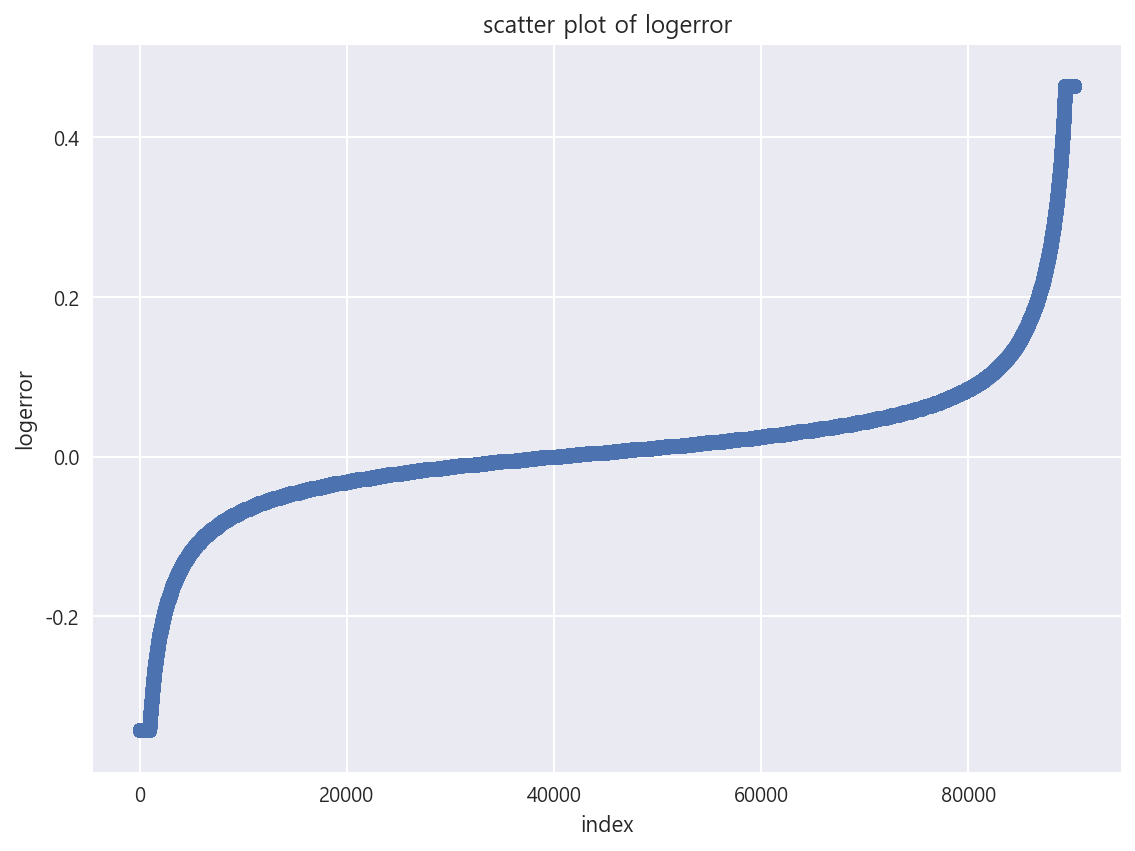

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(range(len(train_16.logerror)),np.sort(train_16.logerror))
plt.title('scatter plot of logerror')
plt.xlabel('index')
plt.ylabel('logerror')
plt.tight_layout()
plt.show()

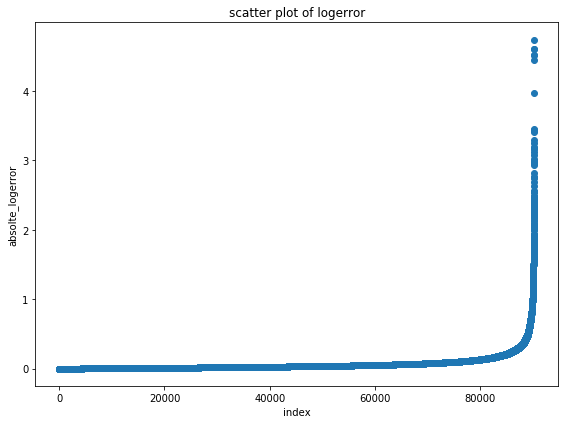

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(range(len(train_16.logerror)),np.sort(np.abs(train_16.logerror)))
plt.title('scatter plot of logerror')
plt.xlabel('index')
plt.ylabel('absolte_logerror')
plt.tight_layout()
plt.show()

In [8]:
# train_16_month = train_16
train_16_month.transactiondate = train_16_month.transactiondate.dt.month
train_16_month
logerror_month = train_16_month.groupby('transactiondate').agg('mean').reset_index()
logerror_month.drop('parcelid',axis=1,inplace=True)
logerror_month.rename(columns={'transactiondate':'transactionmonth','logerror':'mean_of_logerror'})

NameError: name 'train_16_month' is not defined

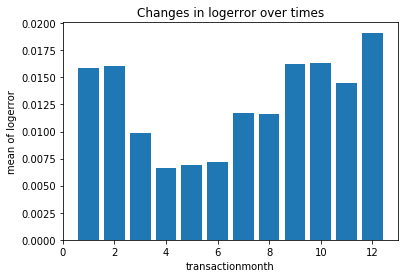

In [60]:
plt.bar(logerror_month.transactiondate,logerror_month.logerror)
plt.title('Changes in logerror over times')
plt.xlabel("transactionmonth")
plt.ylabel("mean of logerror")
plt.show()

for features that have not yet been included in the datasets that could potentially cause the logerror such as market sentiment. When looking at time series of the logerror, there seem to be some indications for market sentiments, as the logerror increases over certain time periods. Given the limited timeframe of the data, it is not possible to generalize such a claim, but it is something we took into account in our feature engineering and data cleaning processes.

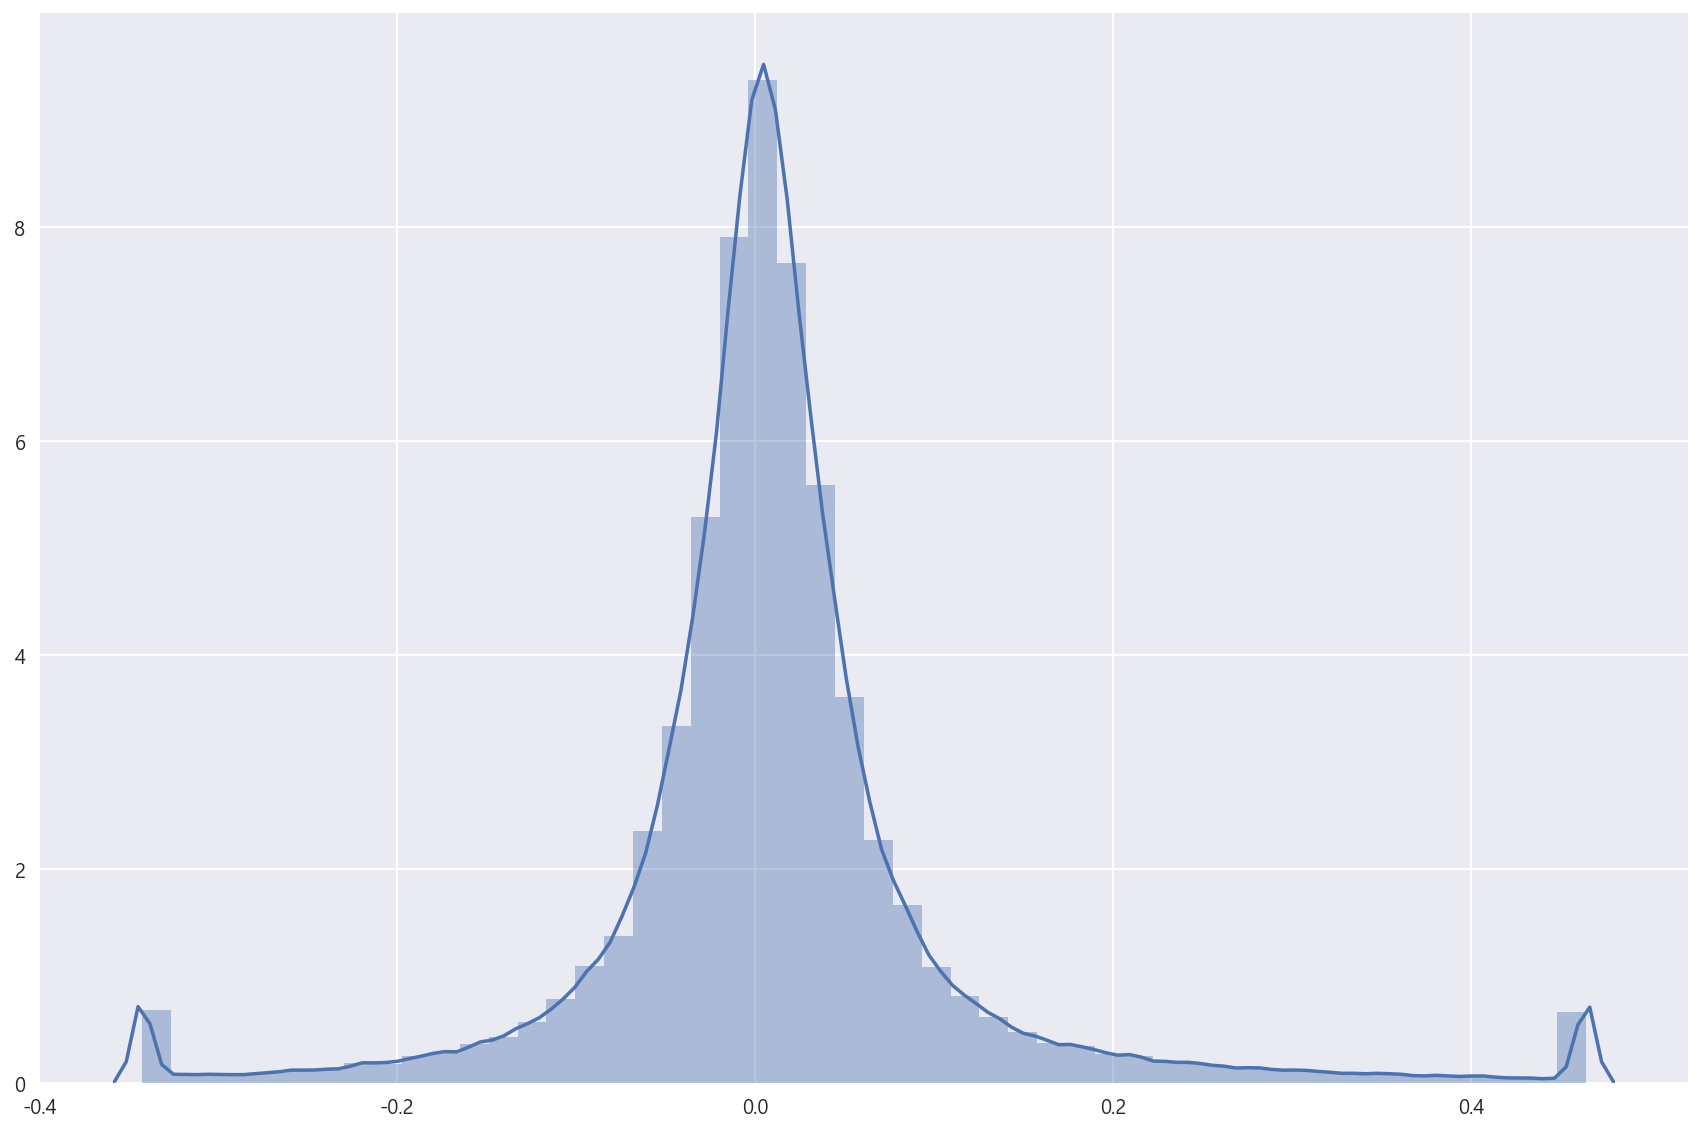

In [57]:
plt.figure(figsize=(12,8))
sns.distplot(train_16.logerror.values)
plt.tight_layout()
plt.show()

### Question : logerror의 outlier를 없애야 하는 이유가 무엇인가

### About transactiondate

In [92]:
train_16.transactiondate = train_16.transactiondate.dt.month
cnt_month = train_16.transactiondate.value_counts()
cnt_month

6     10922
8     10476
5      9961
7      9947
9      9575
4      9311
3      8652
1      6556
2      6333
10     4977
11     1826
12     1739
Name: transactiondate, dtype: int64

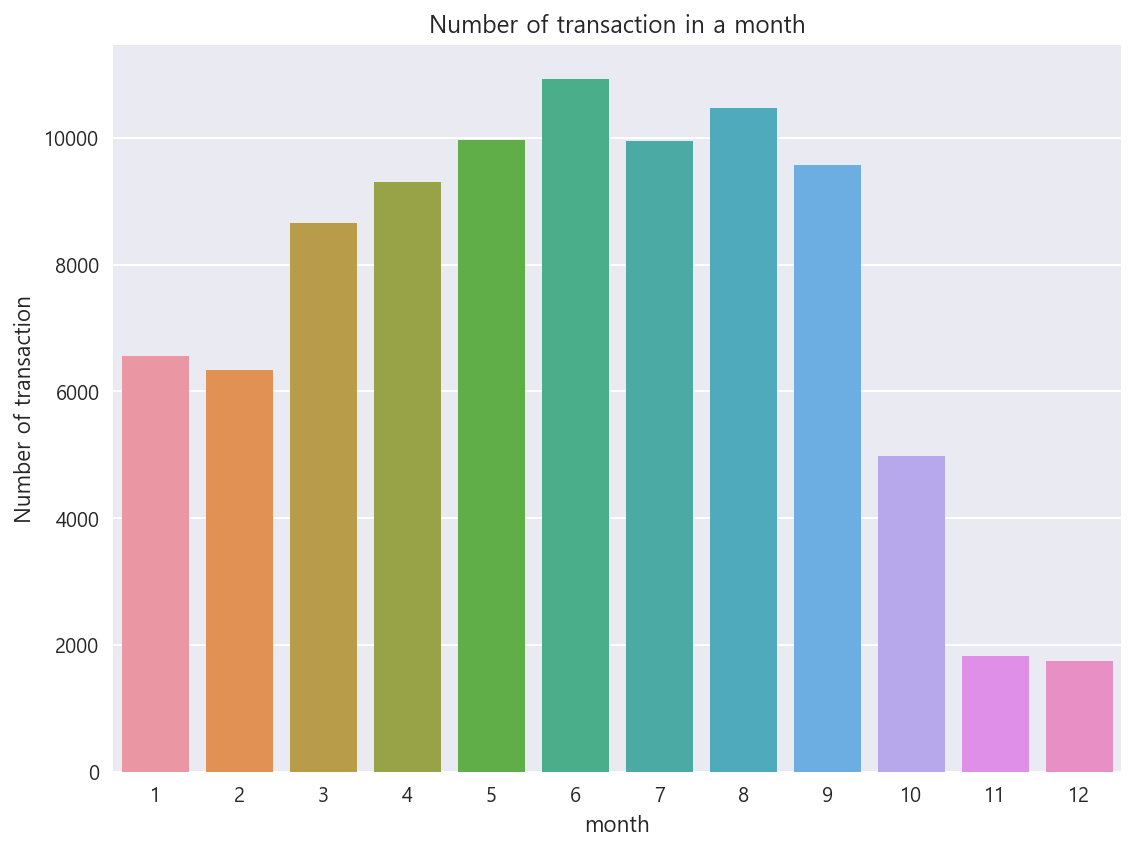

In [93]:
plt.figure(figsize=(8,6))
sns.barplot(cnt_month.index,cnt_month.values)
plt.title('Number of transaction in a month')
plt.xlabel('month')
plt.ylabel('Number of transaction')
plt.tight_layout()
plt.show()

2016년에 train이 된 데이터 중 어느 달(month)에 transaction이 얼마나 많이 되었나에 관한 bar plot입니다. 보면, 10,11,12월에 상대적으로 적은 양의 transaction이 이루어졌음을 알 수 있습니다.

### About Parcelid

In [103]:
train_16.parcelid.head()

0    11016594
1    14366692
2    12098116
3    12643413
4    14432541
Name: parcelid, dtype: int64

이번에는 transaction이 된 house의 ID를 의미하는 parcelid에 대해서 value_count를 해보겠습니다. 중복되는 parcelid가 있는지에 대해, 중복되는 parcelid가 있다면 얼마나 있는지 확인해보겠습니다.

In [105]:
train_16.parcelid.head()

0    11016594
1    14366692
2    12098116
3    12643413
4    14432541
Name: parcelid, dtype: int64

In [9]:
overlapped_parcelid = (train_16.parcelid.value_counts().reset_index())['parcelid'].value_counts()

In [10]:
overlapped_parcelid

1    90026
2      123
3        1
Name: parcelid, dtype: int64

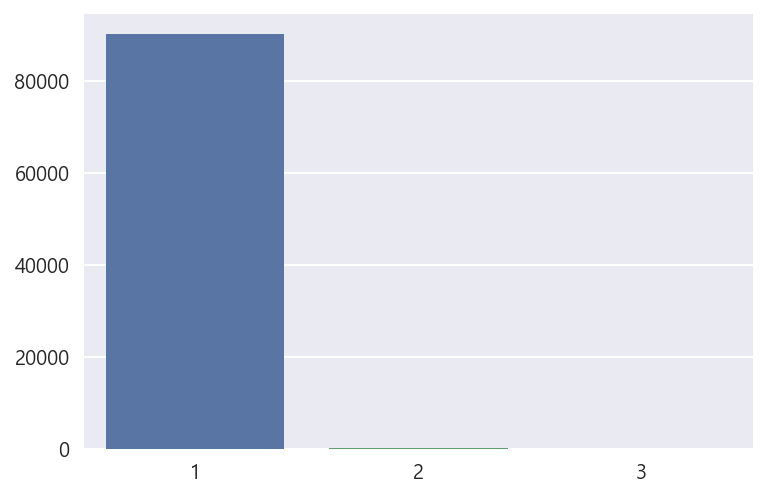

In [124]:
sns.barplot(overlapped_parcelid.index,overlapped_parcelid.values)

중복되는 parcelid의 데이터가 있지만 위의 bar plot에서 볼 수 있다시피, 상대적으로 보면, 각각의 ID는 한 번씩 나온다고 할 수 있습니다.

## train 과 prop 데이터 scale이 다르기 때문에 parcelid 에 따라서 merge해줍니다.

In [11]:
train_df = pd.merge(train_16,prop_16,on='parcelid', how ='left')

In [241]:
print(len(train_df))
train_df.head()

90275


,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,1,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,1,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,1,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,1,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,1,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


## dtype 분석하기

In [18]:
prop_16.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [19]:
data_typeDF = prop_16.iloc[:,1:].dtypes.value_counts().reset_index()\
.rename(columns={"index":"variableType",0:"count"})
data_typeDF
# parcelid dtype은 빼주었습니다.

,variableType,count
0,float64,52
1,object,5


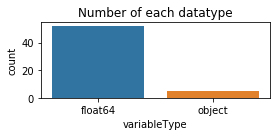

In [20]:
plt.figure(figsize=(4,2))
sns.barplot(data_typeDF['variableType'],data_typeDF['count'])
plt.title('Number of each datatype')
plt.tight_layout()
plt.show()

## missing_value 분석하기

- missing_value를 분석할 때는, merged 데이터가 아니라 기존의 properties데이터 내에서 missing_value 규모를 분석합니다.
- 그 이유는 이후에 실시할, imputation strategy에서 missing_value ratio에 따라서 컬럼(factor)에 대한 imputation을 진행할 것이기 때문에 총 데이터가 있어야 합니다.

In [7]:
missing_df = prop_16.isnull()
missing_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,False,True,True,True,False,False,True,True,True,True,...,True,True,True,False,False,False,True,True,True,True
1,False,True,True,True,False,False,True,True,True,True,...,True,True,True,False,False,False,True,True,True,True
2,False,True,True,True,False,False,True,True,True,True,...,True,True,False,False,False,False,False,True,True,True
3,False,True,True,True,False,False,False,False,True,True,...,False,True,False,False,False,False,False,True,True,True
4,False,True,True,True,False,False,False,True,True,True,...,True,True,False,False,False,False,False,True,True,True


In [8]:
missing_df = prop_16.isna().sum().reset_index().rename(columns={'index':'missing_col',0:'missing_count'})
missing_df = missing_df.loc[missing_df.missing_count>0]
missing_df.sort_values(by='missing_count',inplace=True)
missing_df.index = missing_df.index.sort_values()
missing_df.head()

,missing_col,missing_count
1,rawcensustractandblock,11437
2,longitude,11437
3,latitude,11437
4,regionidcounty,11437
5,fips,11437


## first method

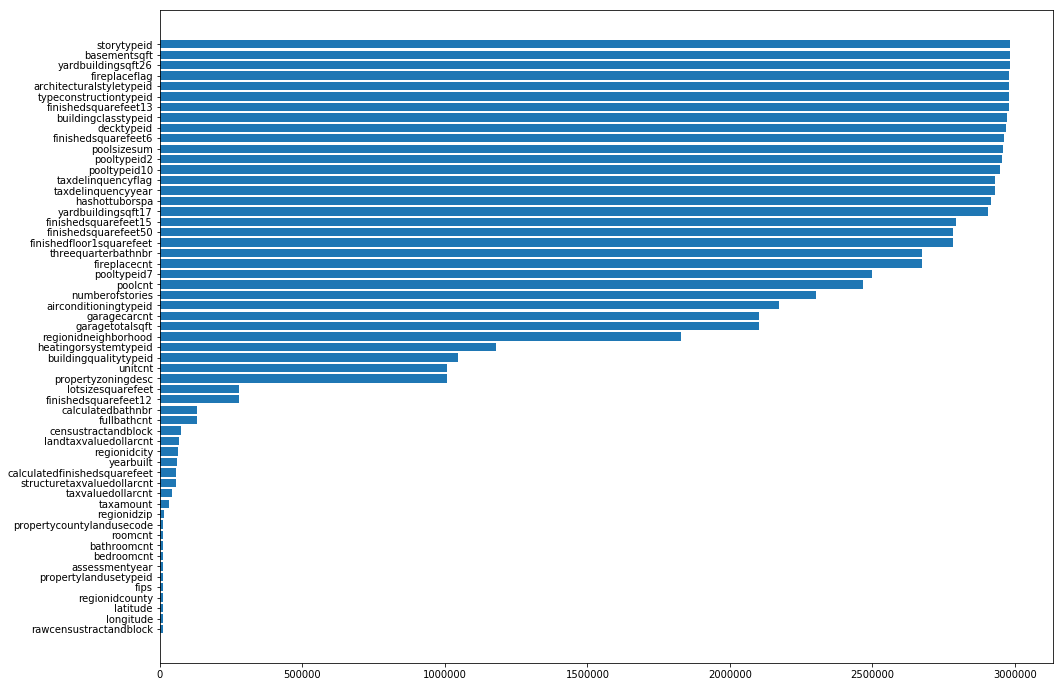

In [9]:
plt.figure(figsize=(16,12))
plt.barh(missing_df.missing_col,missing_df.missing_count)
plt.show()

## second method

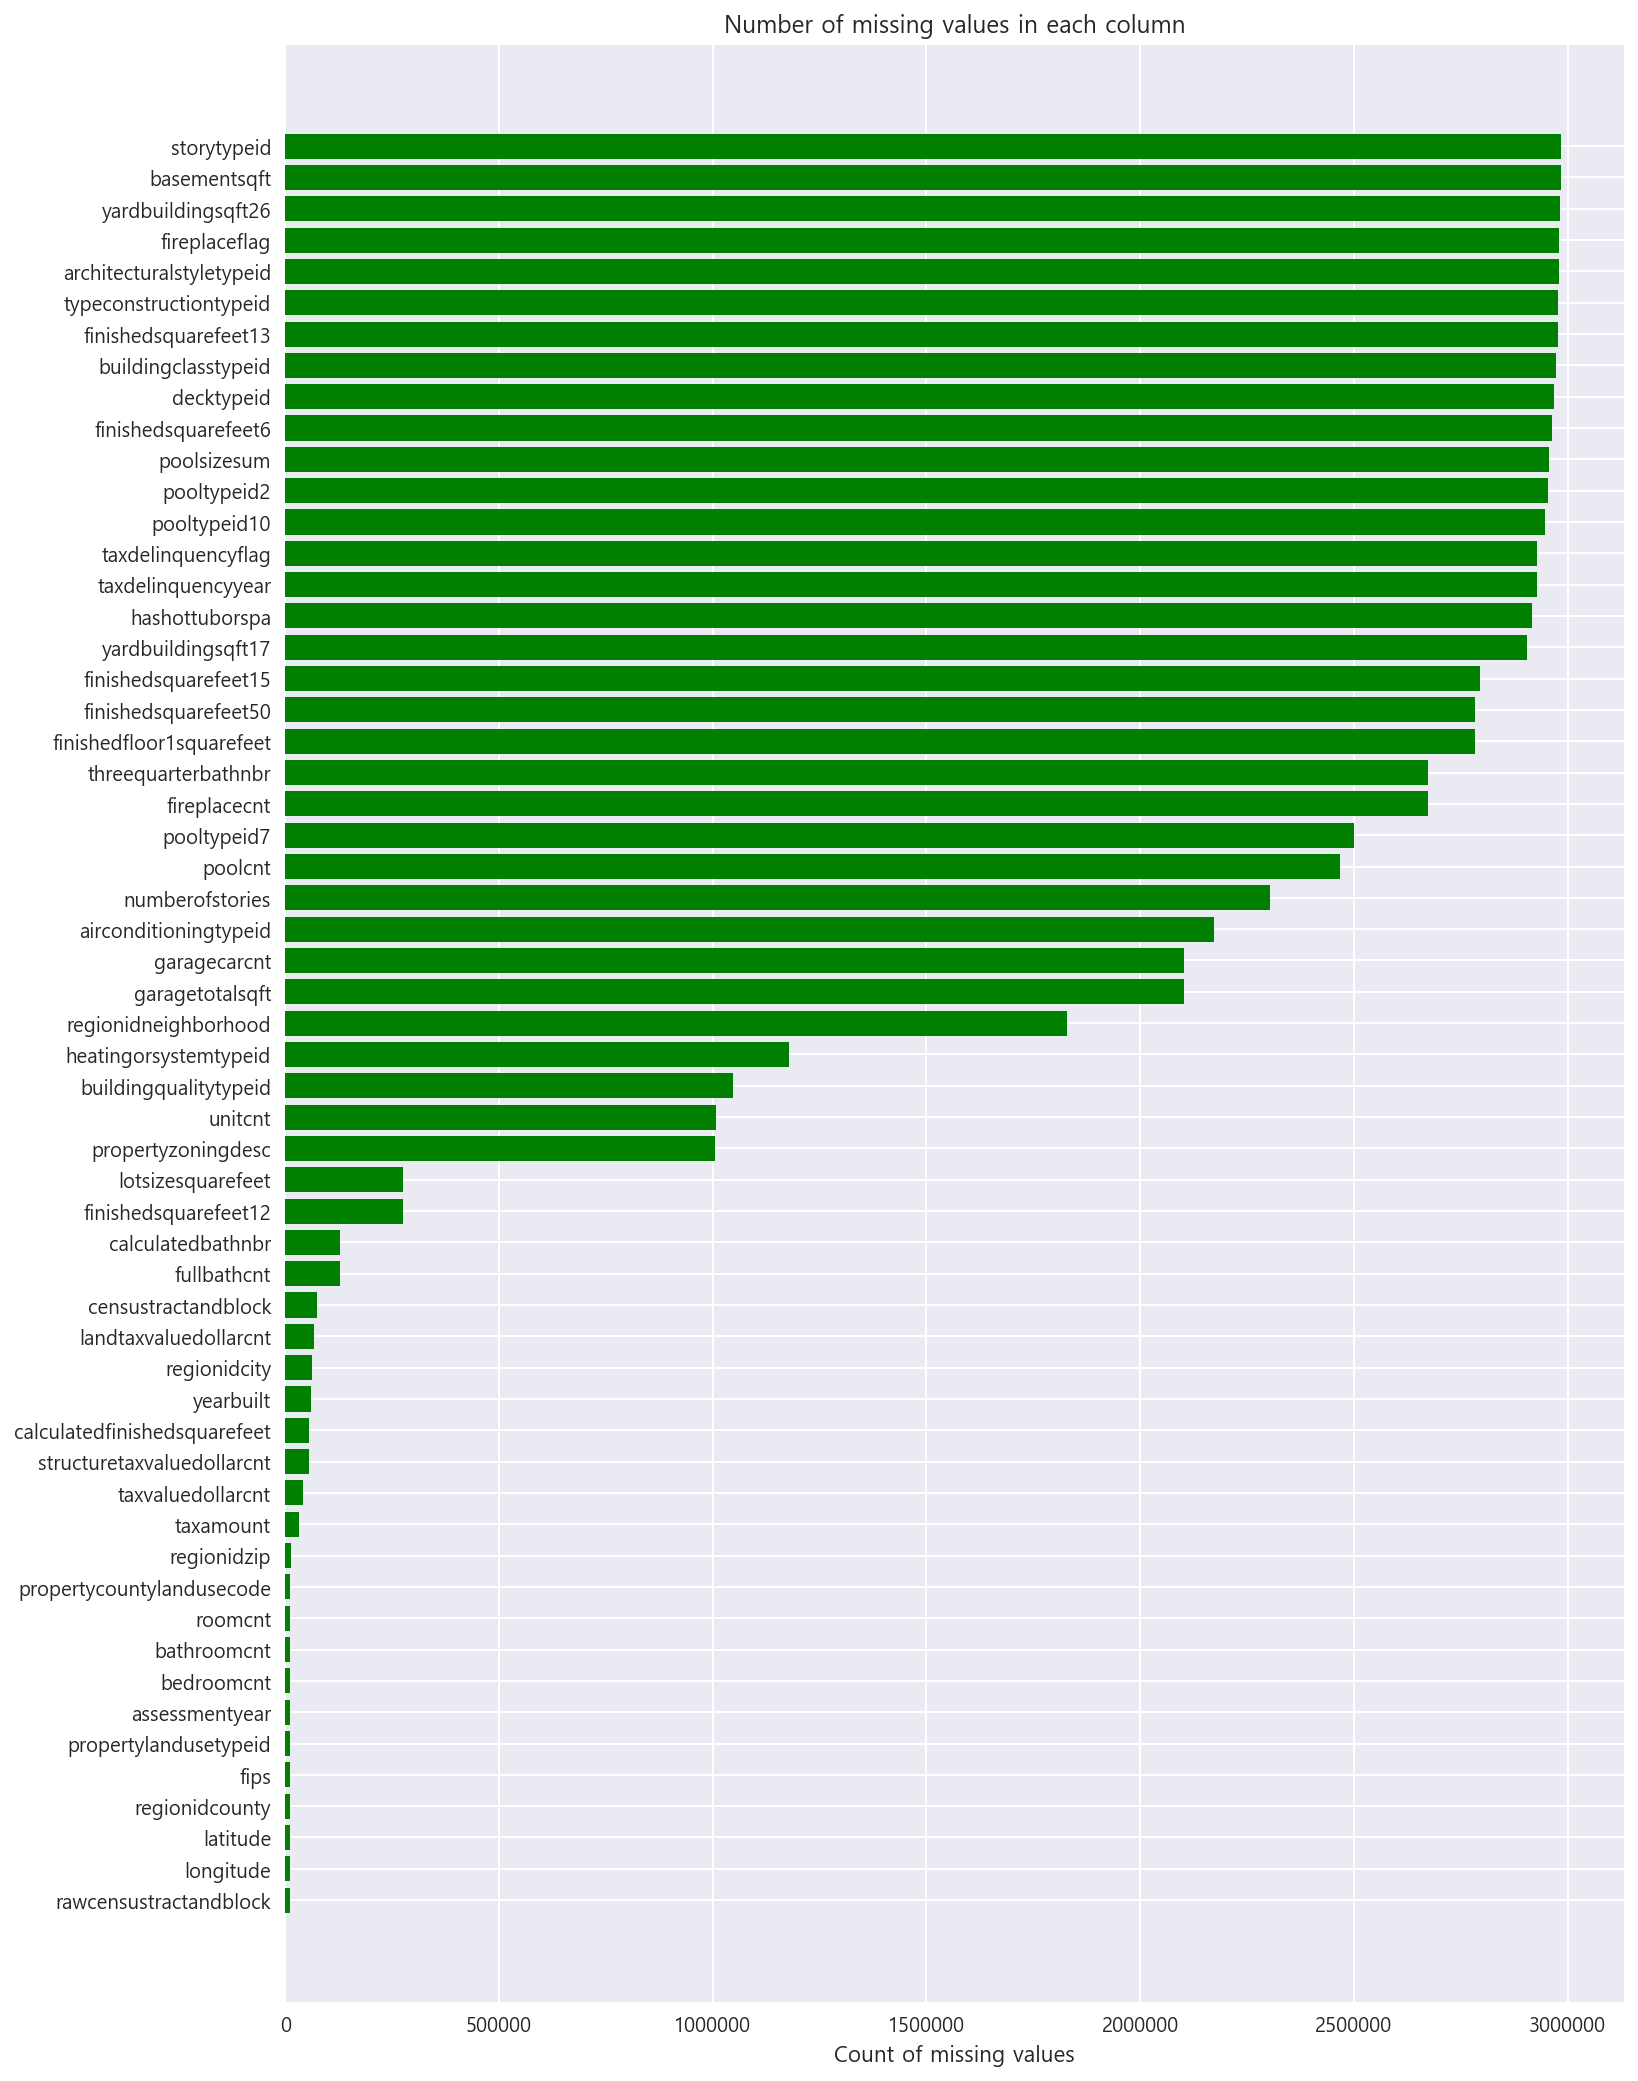

In [239]:
ind = np.arange(len(missing_df))
fig,ax = plt.subplots(figsize=(12,18))
ax.barh(ind, missing_df.missing_count.values, color='green')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.missing_col.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

subplot 명령은 그리드(grid) 형태의 Axes 객체들을 생성하는데 Figure가 행렬(matrix)이고 Axes가 행렬의 원소라고 생각하면 된다. 예를 들어 위와 아래 두 개의 플롯이 있는 경우 행이 2 이고 열이 1인 2x1 행렬이다. subplot 명령은 세개의 인수를 가지는데 처음 두개의 원소가 전체 그리드 행렬의 모양을 지시하는 두 숫자이고 세번째 인수가 네 개 중 어느것인지를 의미하는 숫자이다. 따라서 위/아래 두개의 플롯을 하나의 Figure 안에 그리려면 다음처럼 명령을 실행해야 한다. 여기에서 숫자 인덱싱은 파이썬이 아닌 Matlab 관행을 따르기 때문에 첫번째 플롯을 가리키는 숫자가 0이 아니라 1임에 주의하라.

99%이상이 missingnum인 column을 dataframe으로 나타내보자!!

In [244]:
missing_df.head(3)

,missing_col,missing_count
1,rawcensustractandblock,11437
2,longitude,11437
3,latitude,11437


In [252]:
missing_df = train_df.isnull().sum().reset_index().rename(columns={'index':'missing_col',0:'missing_count'})
missing_df = missing_df.loc[missing_df.missing_count>0]
missing_df.sort_values(by='missing_count',inplace=True)
missing_df['missing_ratio']= missing_df.missing_count/ len(train_df)
missing_df.loc[missing_df.missing_ratio>0.99]

,missing_col,missing_count,missing_ratio
11,decktypeid,89617,0.992711
18,finishedsquarefeet6,89854,0.995336
45,typeconstructiontypeid,89976,0.996688
4,architecturalstyletypeid,90014,0.997109
51,fireplaceflag,90053,0.997541
48,yardbuildingsqft26,90180,0.998948
43,storytypeid,90232,0.999524
5,basementsqft,90232,0.999524
15,finishedsquarefeet13,90242,0.999634
8,buildingclasstypeid,90259,0.999823


### 위의 데이터프레임에서 구한 missing_ratio columns 는 후에 imputation strategy에서 missing value operation을 할 때 사용된다.

## Data Cleaning
-  We don’t know how did Zillow get the result of Zestimate from their models. I mean, it’s highly likely that the inaccuracy of Zestimate is somewhat related to the missingness. That is to say, the value we need to predict in here, the logerror, is just introduced by those missing values. So it would be a very interesting that we could train the model while preserving those NA information to some extent in the data. However, we also need to provide an imputation version of the data, which would be more reasonable to train the model in common situation, like what we were always doing in most Kaggle machine learning competitions.

- First approach:
    - Preserve all the columns, made some reasonable imputations, e.g. area / num_garage, area / num_pool, etc.;
    - set the NAs to zero;
    - Shrink the number of levels by separating categorical columns to fit in different models, i.e. Rpart, RandomForest.
- Second approach:
    - Delete columns with more than 75% missingness;
    - Remove duplicated, highly correlated columns, which may cause collinearity;
    - Scale the geographical information;
    - Remove all NA property observations (11437 out of 2985217 properties observations)

In [22]:
train_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13
